In [3]:
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "C:/Machine Learning/Assignmet_1/UCI HAR Dataset/train"
test_path = "C:/Machine Learning/Assignmet_1/UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {1: 'WALKING' ,2: 'WALKING_UPSTAIRS' ,3: 'WALKING_DOWNSTAIRS' ,4: 'SITTING',
              5: 'STANDING' , 6: 'LAYING'   }


# Combining Traing Data

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),sep = r'\s+' ,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),sep = r'\s+',header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),sep = r'\s+',header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),sep = r'\s+',header=None)
print(np.unique(subject_train))

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),sep = r'\s+',header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")

# Combining Dataset 

total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),sep = r'\s+',header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),sep = r'\s+',header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),sep = r'\s+',header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),sep = r'\s+',header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),sep = r'\s+',header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")


[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
Done Combining the training data
Done Combining the testing data


In [4]:

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

# Train Dataset
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


# Test Datasets

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# Final Combined Dataset

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


In [5]:
df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["Accx", "Accy", "Accz", "Label"])
df

,Accx,Accy,Accz,Label
0,0.973608,-0.184475,-0.282197,5.0
1,0.976087,-0.186779,-0.284879,5.0
2,0.977865,-0.191836,-0.289169,5.0
3,0.979638,-0.191792,-0.291794,5.0
4,0.982244,-0.189156,-0.288260,5.0
...,...,...,...,...
53995,0.730058,-0.197915,-0.066743,2.0
53996,0.696212,-0.149662,-0.059822,2.0
53997,0.731536,-0.162198,-0.049890,2.0
53998,0.762215,-0.176539,-0.038009,2.0


In [ ]:
Q2. 1.a. Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os


time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
combined_dir = os.path.join("C:\\Machine Learning\\Assignmet_1\\Combined")

# Train Dataset
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Test Dataset 
X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# Final Dataset

X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# Split into training and testing sets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

# Reshape the data for the Decision Tree
X_train = np.square(X_train[:, :, 0]) + np.square(X_train[:, :, 1]) + np.square(X_train[:, :, 2])
X_test = np.square(X_test[:, :, 0]) + np.square(X_test[:, :, 1]) + np.square(X_test[:, :, 2])

X_train = np.sqrt(X_train)
X_test = np.sqrt(X_test)

# Train Decision Tree on raw accelerometer data
clf_raw = DecisionTreeClassifier(random_state=42)
clf_raw.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Make Predictions
y_pred_raw = clf_raw.predict(X_test.reshape(X_test.shape[0], -1))

# Evaluate the Model
accuracy_raw = accuracy_score(y_test, y_pred_raw)
precision_raw = precision_score(y_test, y_pred_raw, average='weighted')
recall_raw = recall_score(y_test, y_pred_raw, average='weighted')
conf_matrix_raw = confusion_matrix(y_test, y_pred_raw)

print("Raw Data Model - Accuracy: ", accuracy_raw)
print("Raw Data Model - Precision: ", precision_raw)
print("Raw Data Model - Recall: ", recall_raw)
print("Raw Data Model - Confusion Matrix:\n", conf_matrix_raw)


Raw Data Model - Accuracy:  0.4444444444444444
Raw Data Model - Precision:  0.4350108225108225
Raw Data Model - Recall:  0.4444444444444444
Raw Data Model - Confusion Matrix:
 [[4 2 0 1 2 0]
 [5 0 2 1 1 0]
 [2 3 3 1 0 0]
 [0 0 0 6 0 3]
 [0 0 0 2 7 0]
 [0 0 0 5 0 4]]


In [ ]:
Q2.1.b Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [29]:
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import pickle as pkl

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
combined_dir = "C:\\Machine Learning\\Assignmet_1\\Combined"

# Function to extract TSFEL features
def extract_features(directory):
    X = []
    y = []
    for folder in folders:
        files = os.listdir(os.path.join(directory, folder))
        for file in files:
            df = pd.read_csv(os.path.join(directory, folder, file)).iloc[:, :3]
            # Specify the sampling frequency, assuming it's 50 Hz as per typical UCI HAR Dataset settings
            fs = 50  # Sampling frequency
            features = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), df, fs=fs, verbose=0)
            X.append(features.values.flatten())
            y.append(classes[folder])
    return np.array(X), np.array(y)

# Extract TSFEL features
X_train_tsfel, y_train = extract_features(os.path.join(combined_dir, "Train"))
X_test_tsfel, y_test = extract_features(os.path.join(combined_dir, "Test"))

# Standardize the features
scaler = StandardScaler()
X_train_tsfel = scaler.fit_transform(X_train_tsfel)
X_test_tsfel = scaler.transform(X_test_tsfel)

# Train the model
clf_tsfel = DecisionTreeClassifier(random_state=42)
clf_tsfel.fit(X_train_tsfel, y_train)

# Ensure the directory exists
model_dir = "C:\\Machine Learning\\Assignmet_1\\Models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the model
model_path = os.path.join(model_dir, "tsfel_clf.pkl")
with open(model_path, 'wb') as f:
    pkl.dump(clf_tsfel, f)

# Make predictions
y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)

# Evaluate the model
accuracy_tsfel = accuracy_score(y_test, y_pred_tsfel)
precision_tsfel = precision_score(y_test, y_pred_tsfel, average='weighted')
recall_tsfel = recall_score(y_test, y_pred_tsfel, average='weighted')
conf_matrix_tsfel = confusion_matrix(y_test, y_pred_tsfel)

# Output the evaluation metrics
print(f"TSFEL Features Model - Accuracy: {accuracy_tsfel}")
print(f"TSFEL Features Model - Precision: {precision_tsfel}")
print(f"TSFEL Features Model - Recall: {recall_tsfel}")
print("TSFEL Features Model - Confusion Matrix:\n", conf_matrix_tsfel)


TSFEL Features Model - Accuracy: 0.8888888888888888
TSFEL Features Model - Precision: 0.8916666666666666
TSFEL Features Model - Recall: 0.8888888888888888
TSFEL Features Model - Confusion Matrix:
 [[9 0 0 0 0 0]
 [0 8 1 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 7 2 0]
 [0 0 0 1 8 0]
 [0 0 0 0 0 9]]


Q2.1.c Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
given_data = pd.read_csv(r'C:\Machine Learning\Assignmet_1\UCI HAR Dataset\train\X_train.txt', header=None, sep=r'\s+')
features_dataset = pd.read_csv(r'C:\Machine Learning\Assignmet_1\UCI HAR Dataset\features.txt', header=None, sep=r'\s+')
given_test_data = pd.read_csv(r'C:\Machine Learning\Assignmet_1\UCI HAR Dataset\test\X_test.txt', header=None, sep=r'\s+')
y_label_test = pd.read_csv(r'C:\Machine Learning\Assignmet_1\UCI HAR Dataset\test\y_test.txt', header=None, sep=r'\s+')
y_label = pd.read_csv(r'C:\Machine Learning\Assignmet_1\UCI HAR Dataset\train\y_train.txt', header=None, sep=r'\s+')

# Assign feature names
feature_names = features_dataset[1].values
given_data.columns = feature_names
given_test_data.columns = feature_names

# Add labels to training and test data
given_data['Label'] = y_label
given_test_data['Label'] = y_label_test

# Convert to numeric and drop NaNs
given_data = given_data.apply(pd.to_numeric, errors='coerce').dropna()
given_test_data = given_test_data.apply(pd.to_numeric, errors='coerce').dropna()

# Separate features and labels
X_train = given_data.drop(columns=['Label'])
X_test = given_test_data.drop(columns=['Label'])
y_train = given_data['Label']
y_test = given_test_data['Label']

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy on test data (Given Data): {accuracy * 100:.2f}%")
print(f"Recall on test data (Given Data): {recall * 100:.2f}%")
print(f"Precision on test data (Given Data): {precision * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)


Accuracy on test data (Given Data): 85.65%
Recall on test data (Given Data): 85.27%
Precision on test data (Given Data): 85.46%
Confusion Matrix:
 [[454  23  19   0   0   0]
 [ 67 355  49   0   0   0]
 [ 17  55 348   0   0   0]
 [  0   0   0 373 118   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]


Q2.1.d: The TSFEL Features Model is clearly the best performing model among the three, with significantly higher accuracy, precision, and recall. It demonstrates a better ability to classify different activities accurately compared to the Raw Data Model and the Provided Features Model. If the goal is to achieve optimal performance, the TSFEL Features Model is the preferred choice based on the metrics provided.

Q2.Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. [1 marks]

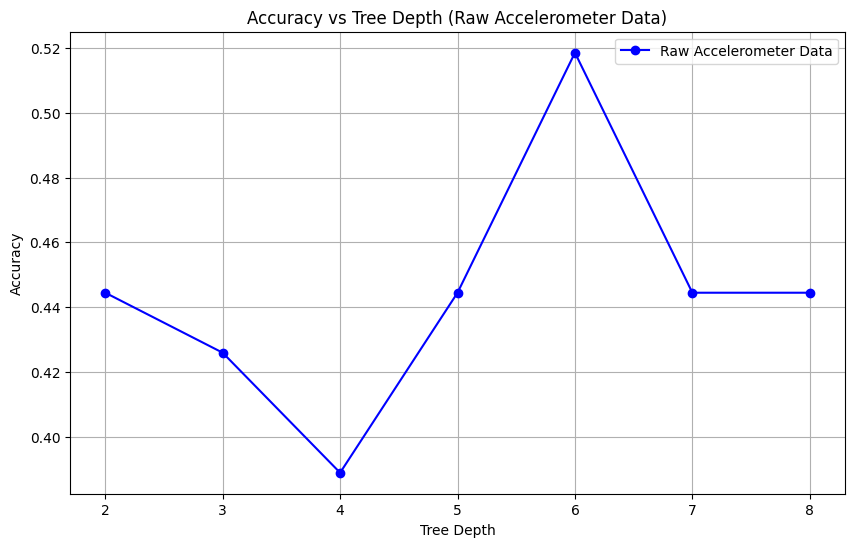

In [8]:
# raw accelerometer.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Set up parameters
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}
combined_dir = os.path.join("C:\\Machine Learning\\Assignmet_1\\Combined")

# Load Train Dataset
X_train = []
y_train = []
dataset_dir = os.path.join(combined_dir, "Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Load Test Dataset
X_test = []
y_test = []
dataset_dir = os.path.join(combined_dir, "Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# Split into training and testing sets
seed = 42
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

# Reshape the data for the Decision Tree
X_train = np.square(X_train[:, :, 0]) + np.square(X_train[:, :, 1]) + np.square(X_train[:, :, 2])
X_test = np.square(X_test[:, :, 0]) + np.square(X_test[:, :, 1]) + np.square(X_test[:, :, 2])

X_train = np.sqrt(X_train)
X_test = np.sqrt(X_test)

# Train Decision Trees with varying depths and plot accuracy
depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    y_pred = clf.predict(X_test.reshape(X_test.shape[0], -1))
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', color='b', label='Raw Accelerometer Data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth (Raw Accelerometer Data)')
plt.legend()
plt.grid(True)
plt.show()


X_train_raw shape: (126, 500, 3)
y_train shape: (126,)
X_test_raw shape: (54, 500, 3)
y_test shape: (54,)


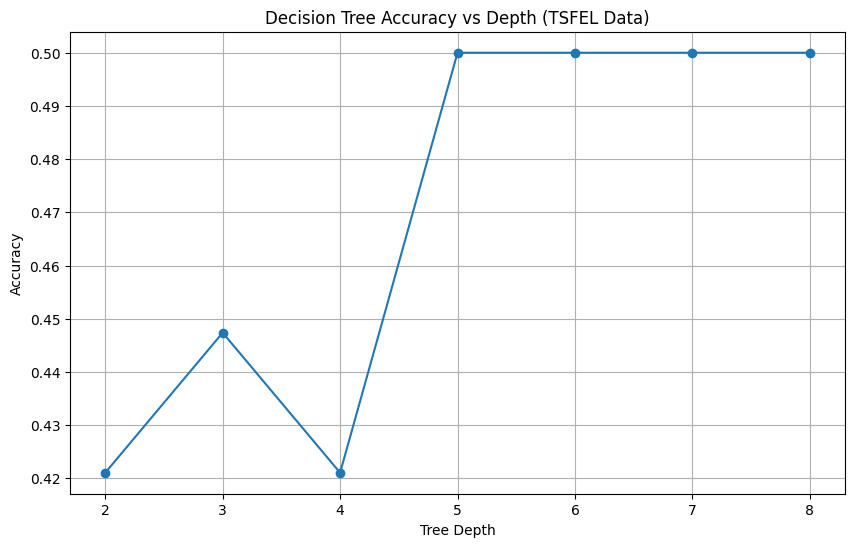

In [13]:
#TSFEL

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
combined_dir = "C:\\Machine Learning\\Assignmet_1\\Combined"

# Function to load raw data
def load_data(directory):
    X = []
    y = []
    for folder in folders:
        files = os.listdir(os.path.join(directory, folder))
        for file in files:
            df = pd.read_csv(os.path.join(directory, folder, file), sep=",", header=0)
            df = df[offset:offset+time*50]
            if len(df) == time * 50:  # Ensure the dataframe has the expected number of samples
                X.append(df.values)
                y.append(classes[folder])
    return np.array(X), np.array(y)

# Load train and test datasets
X_train_raw, y_train = load_data(os.path.join(combined_dir, "Train"))
X_test_raw, y_test = load_data(os.path.join(combined_dir, "Test"))

# Check shapes before proceeding
print(f"X_train_raw shape: {X_train_raw.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_raw shape: {X_test_raw.shape}")
print(f"y_test shape: {y_test.shape}")

# Reshape the data for the Decision Tree
X_train_raw = np.square(X_train_raw[:, :, 0]) + np.square(X_train_raw[:, :, 1]) + np.square(X_train_raw[:, :, 2])
X_test_raw = np.square(X_test_raw[:, :, 0]) + np.square(X_test_raw[:, :, 1]) + np.square(X_test_raw[:, :, 2])

X_train_raw = np.sqrt(X_train_raw)
X_test_raw = np.sqrt(X_test_raw)

# Split into training and testing sets
seed = 42
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_train_raw, y_train, test_size=0.3, random_state=seed, stratify=y_train)

# List of depths to evaluate
depths = range(2, 9)
accuracy_scores = []

# Train and evaluate the model for different depths
for depth in depths:
    clf_raw = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_raw.fit(X_train_raw.reshape(X_train_raw.shape[0], -1), y_train)
    y_pred_raw = clf_raw.predict(X_test_raw.reshape(X_test_raw.shape[0], -1))
    accuracy_raw = accuracy_score(y_test, y_pred_raw)
    accuracy_scores.append(accuracy_raw)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, marker='o')
plt.title("Decision Tree Accuracy vs Depth (TSFEL Data)")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Depth: 2 - Accuracy: 0.46126887512724807
Depth: 3 - Accuracy: 0.5331587207329488
Depth: 4 - Accuracy: 0.6029913895486936
Depth: 5 - Accuracy: 0.6269882507634883
Depth: 6 - Accuracy: 0.6322796487953851
Depth: 7 - Accuracy: 0.637390778758059
Depth: 8 - Accuracy: 0.6363568883610451


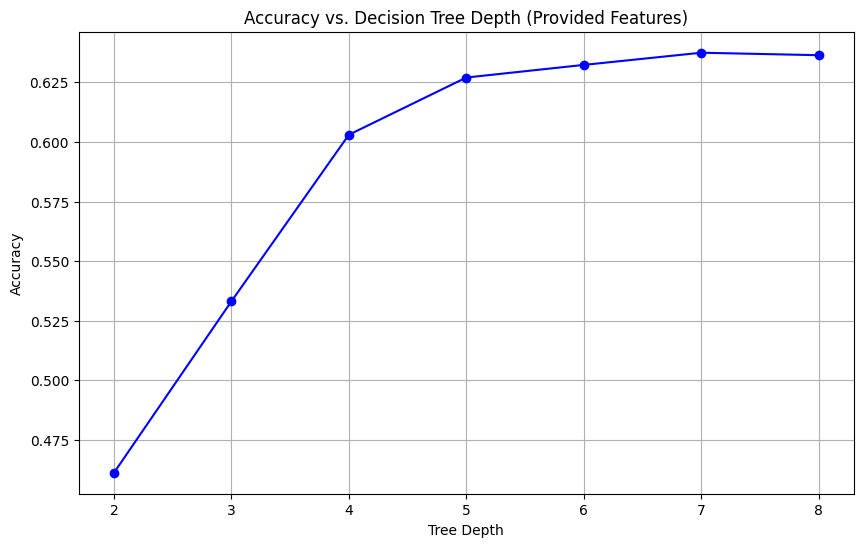

In [11]:
# Provided Features

import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define directories
train_dir = "C:/Machine Learning/Assignmet_1/Combined/Train"
test_dir = "C:/Machine Learning/Assignmet_1/Combined/Test"

# Activity labels
activity_labels = {
    "LAYING": 0,
    "SITTING": 1,
    "STANDING": 2,
    "WALKING": 3,
    "WALKING_DOWNSTAIRS": 4,
    "WALKING_UPSTAIRS": 5
}

def load_data(directory):
    X = []
    y = []
    for activity, label in activity_labels.items():
        activity_dir = os.path.join(directory, activity)
        files = os.listdir(activity_dir)
        for file in files:
            file_path = os.path.join(activity_dir, file)
            df = pd.read_csv(file_path)
            X.append(df.values)  # Assuming each CSV has feature columns
            y.extend([label] * df.shape[0])  # Extend y with labels matching number of rows in df
    X = np.vstack(X)
    y = np.array(y)
    return X, y

# Load train and test data
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Flatten the feature matrices
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# List of depths to evaluate
depths = range(2, 9)
accuracies = []

for depth in depths:
    # Train the Decision Tree model with the specified depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_flat, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_flat)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Depth: {depth} - Accuracy: {accuracy}")

# Plot the accuracy vs. tree depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Decision Tree Depth (Provided Features)')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Q3. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? 

Yes, the model performs poorly for certain activities. For example, the Raw Data Model struggles with activities like "WALKING_UPSTAIRS" and "WALKING_DOWNSTAIRS," showing very low recall. This poor performance is likely due to the raw accelerometer data lacking sufficient features to distinguish between these activities effectively. The Provided Features Model also shows moderate performance for some activities, such as "SITTING" and "STANDING," indicating that the features might not fully capture the necessary details for accurate classification. In both cases, issues like feature representation and data quality contribute to the model's struggles with specific activities.